In [29]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#load Data
df=pd.read_csv('netflix.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


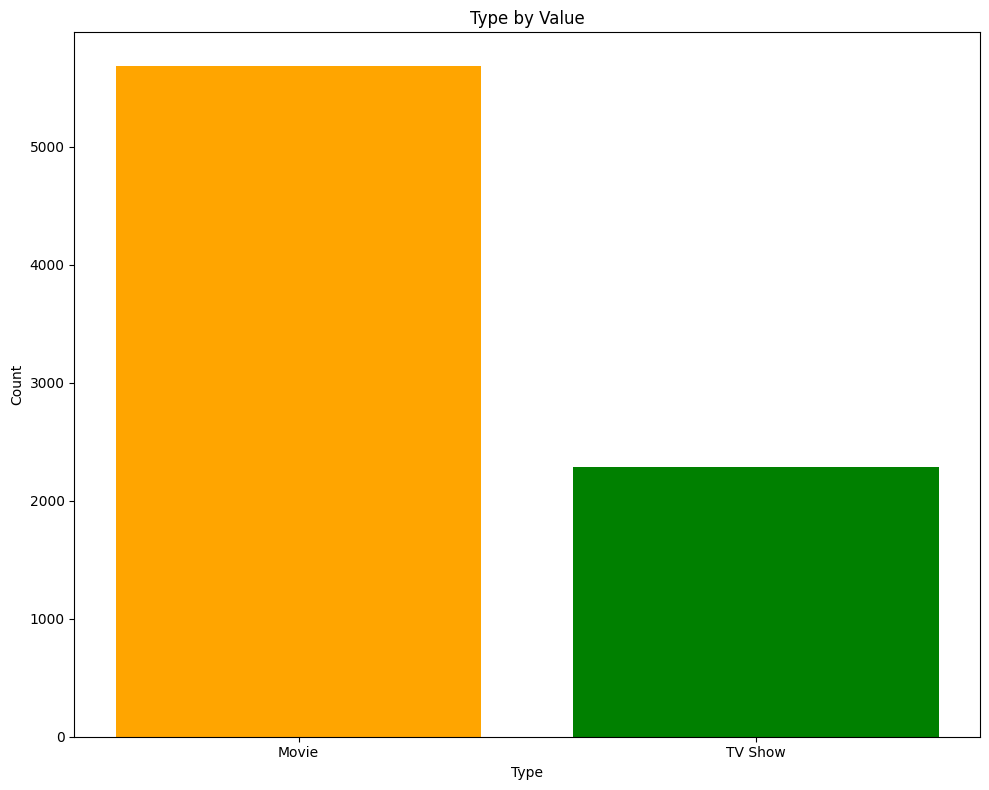

In [31]:
#clean Data
# import library
import pandas as pd
import matplotlib.pyplot as plt

# bar chart
df=df.dropna(subset=['type','release_year','rating','country','duration'])
type_count=df['type'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(type_count.index,type_count.values,color=['orange','green'])
plt.title('Type by Value')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movie_vs_tvshow.png',dpi=1200,bbox_inches=('tight'))
plt.show()


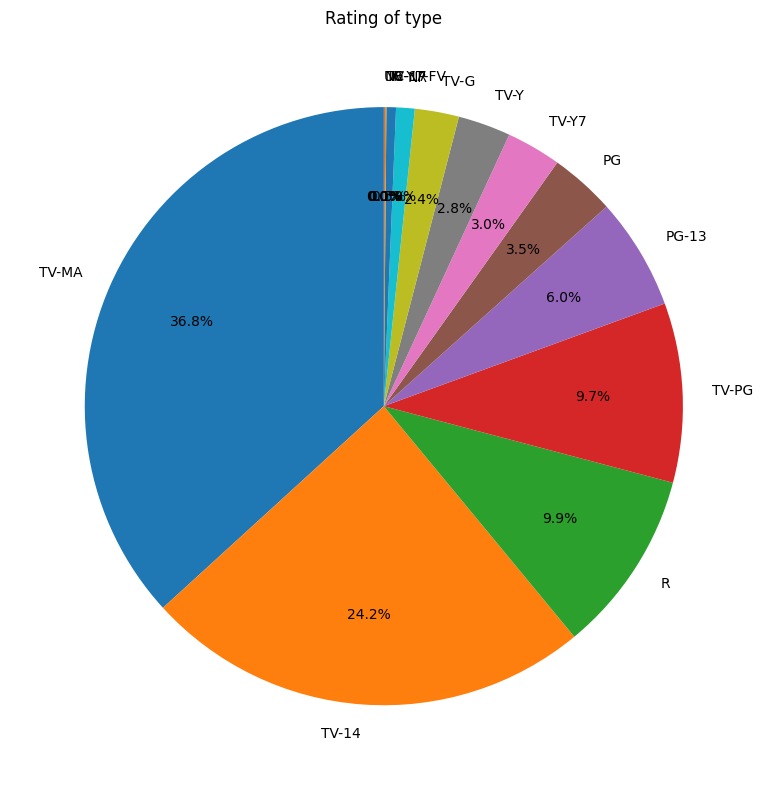

In [32]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

# pie chart
rating_count = df['rating'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    rating_count,
    labels=rating_count.index,
    autopct='%1.1f%%',
    startangle=90,
    labeldistance=1.1,   # move labels out
    pctdistance=0.7      # move % text closer to center
)
plt.title('Rating of type')
plt.tight_layout()
plt.savefig('rating_pie.png', dpi=1200, bbox_inches='tight')
plt.show()


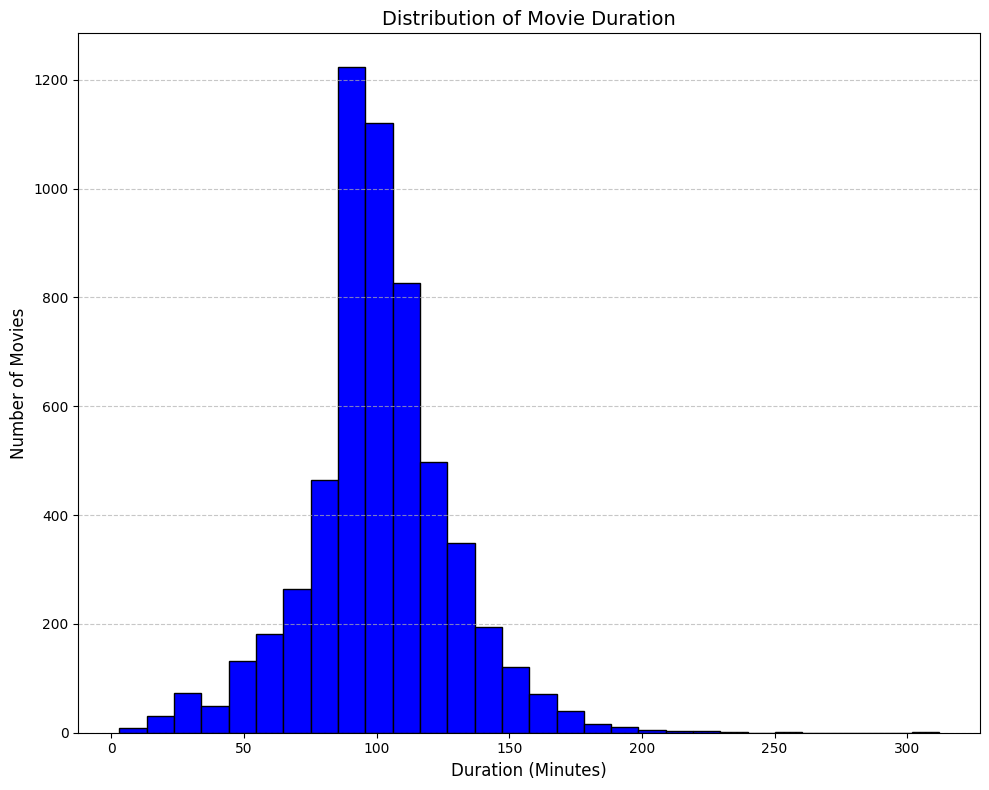

In [33]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

# Hiat chart
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '', regex=False).astype(int)

plt.figure(figsize=(10, 8))
plt.hist(movie_df['duration_int'], bins=30, color='blue', edgecolor='black')

plt.title('Distribution of Movie Duration', fontsize=14)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('movie_by_duration.png', dpi=1200, bbox_inches='tight')
plt.show()

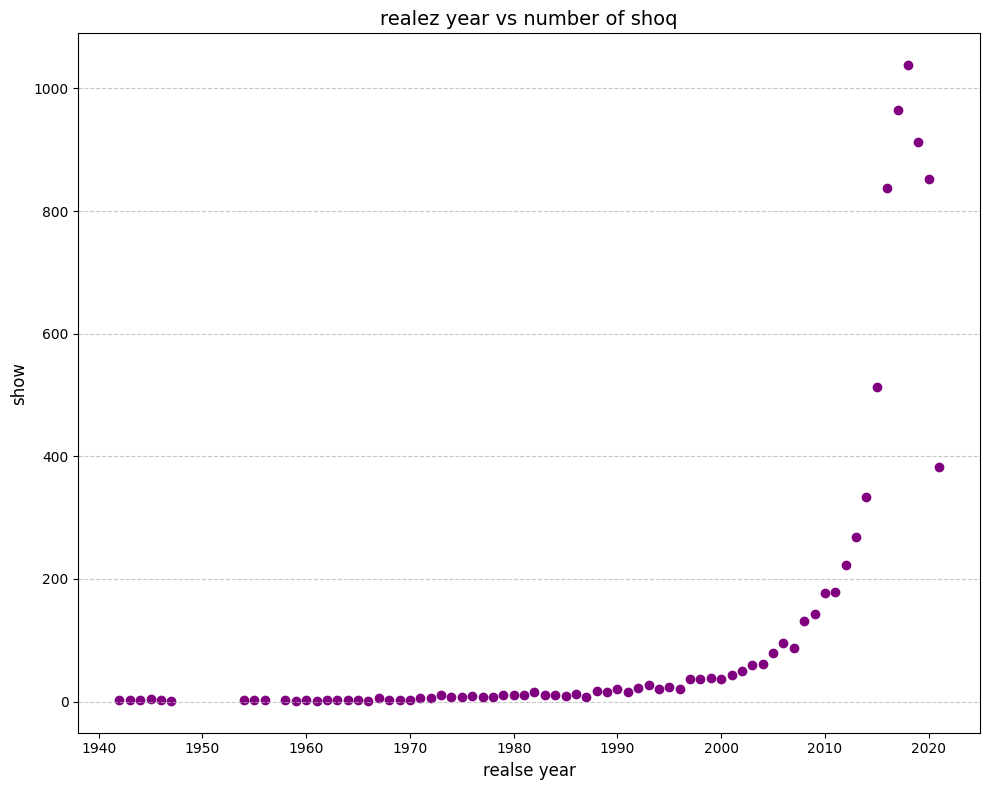

In [34]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

# scatter plot
realez_count=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
plt.scatter(realez_count.index,realez_count.values, color='purple')

plt.title('realez year vs number of shoq', fontsize=14)
plt.xlabel('realse year', fontsize=12)
plt.ylabel('show', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('shoq_by_realze_year.png', dpi=1200, bbox_inches='tight')
plt.show()


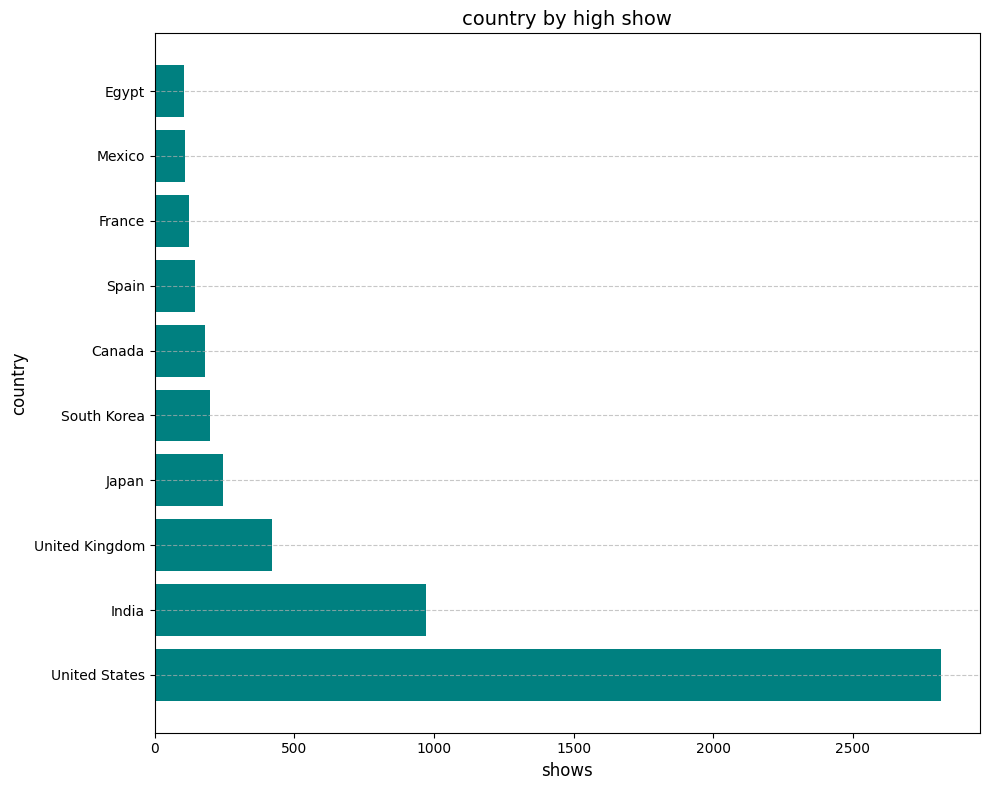

In [35]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

# import library
import pandas as pd
import matplotlib.pyplot as plt

# barh graph

country_count=df['country'].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.barh(country_count.index,country_count.values, color='teal')

plt.title('country by high show', fontsize=14)
plt.xlabel('shows', fontsize=12)
plt.ylabel('country', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('high_country_by_show.png', dpi=1200, bbox_inches='tight')
plt.show()

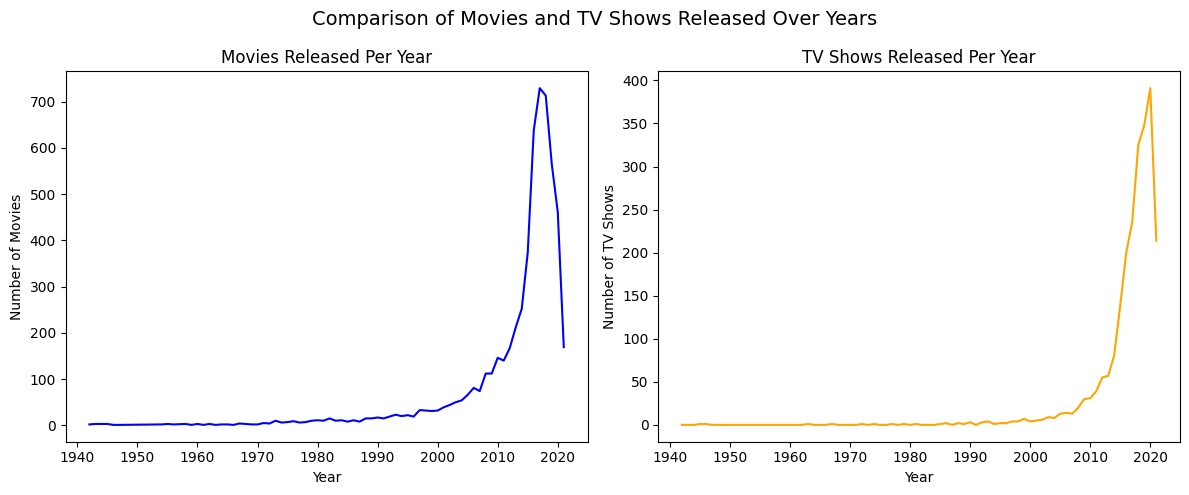

In [36]:
import matplotlib.pyplot as plt

# Group by release year and type, fill missing combinations with 0
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# --- First subplot: Movies ---
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# --- Second subplot: TV Shows ---
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

# Super title for entire figure
fig.suptitle('Comparison of Movies and TV Shows Released Over Years', fontsize=14)

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


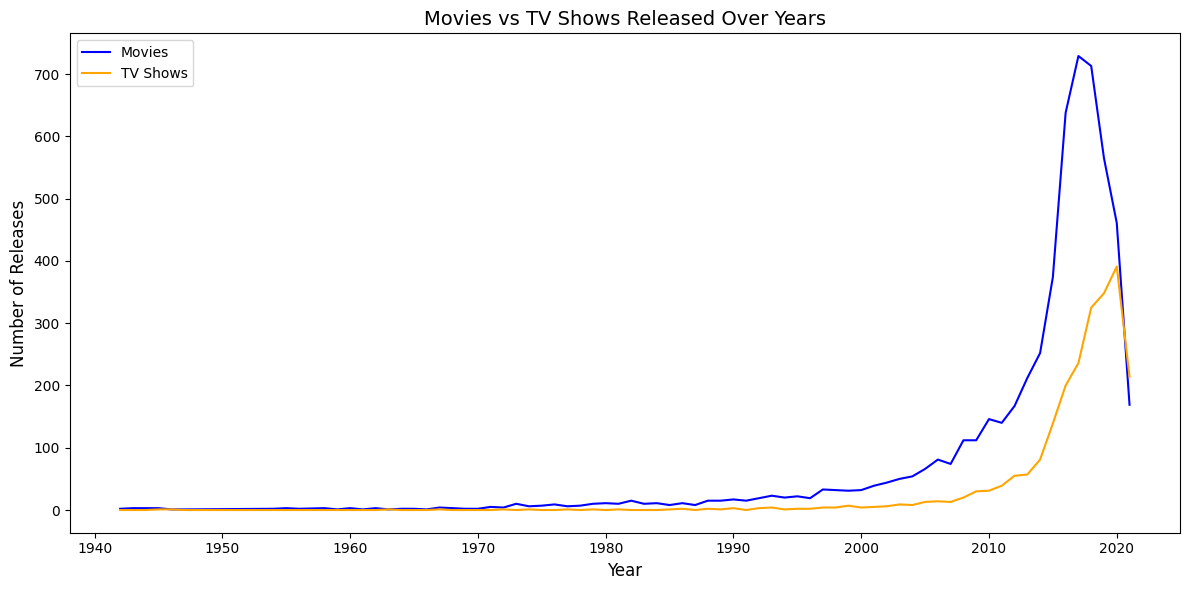

In [38]:
import matplotlib.pyplot as plt

# Group by release year and type, fill missing combinations with 0
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Create a single figure and axes
plt.figure(figsize=(12, 6))

# Plot both lines
plt.plot(content_by_year.index, content_by_year['Movie'], label='Movies', color='blue')
plt.plot(content_by_year.index, content_by_year['TV Show'], label='TV Shows', color='orange')

# Titles and labels
plt.title('Movies vs TV Shows Released Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.legend()  # Show legend

plt.tight_layout()
plt.savefig('movies_tv_shows_combined.png', dpi=300, bbox_inches='tight')
plt.show()
